In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train_data_eda.csv')
train.head()

,Unnamed: 0,industry code,occupation code,class of worker,wage per hour,capital,divdends from stocks,marital status,race,sex,...,weeks worked in year,education,full or part time employment stat,tax filer status,own business or self employed,veterans benefits,employment status,num persons worked for employer,Citizenship_combined,total person income
0,0,Not in universe,Not in universe,Not in universe,0,0,0,Single,White,Female,...,0,2,Not in labor force,Nonfiler,0,2,Not in universe,0,Native,-50000
1,1,Construction,"Precision production, craft and repair",Self-employed,0,0,0,Single,White,Male,...,2,2,Children or Armed Forces,Head of household,0,2,employed,1,Native,-50000
2,2,Unemployed or studying,Unemployed or studying,Unemployed or studying,0,0,0,Single,Minority,Female,...,0,2,Not in labor force,Nonfiler,0,2,Not in universe,0,Foreign born- Not a citizen of U S,-50000
3,3,Children,Children,Children,0,0,0,Single,White,Female,...,0,0,Children or Armed Forces,Nonfiler,0,0,children,0,Native,-50000
4,4,Children,Children,Children,0,0,0,Single,White,Female,...,0,0,Children or Armed Forces,Nonfiler,0,0,children,0,Native,-50000


In [4]:
test = pd.read_csv('test_data_eda.csv')
test.head()

,Unnamed: 0,industry code,occupation code,class of worker,wage per hour,capital,divdends from stocks,marital status,race,sex,...,weeks worked in year,education,full or part time employment stat,tax filer status,own business or self employed,veterans benefits,employment status,num persons worked for employer,Citizenship_combined,total person income
0,0,Manufacturing,"Operators, fabricators and laborers",Private,0,0,0,Married,White,Female,...,1,1,Full-time schedules,Joint one under 65 & one 65+,0,2,employed,4,Foreign born- Not a citizen of U S,-50000
1,1,Services,Managerial and professional speciality,Self-employed,0,0,2500,Married,White,Female,...,1,5,PT for econ reasons usually PT,Joint both under 65,0,2,employed,1,Native,-50000
2,2,Children,Children,Children,0,0,0,Single,White,Male,...,0,0,Children or Armed Forces,Nonfiler,0,0,children,0,Native,-50000
3,3,Transportation and public utilities,Managerial and professional speciality,Private,0,0,0,Single,White,Female,...,2,2,Children or Armed Forces,Head of household,2,2,employed,5,Native,-50000
4,4,Construction,"Precision production, craft and repair",Private,0,0,0,Single,White,Male,...,2,2,Full-time schedules,Single,0,2,employed,4,Native,-50000


In [5]:
train.drop("Unnamed: 0", axis=1,inplace=True)
test.drop("Unnamed: 0", axis=1,inplace=True)

In [6]:
train['total person income'] = train['total person income'].map({'-50000' : 0, ' 50000+.' : 1})
test['total person income'] = test['total person income'].map({'-50000' : 0, ' 50000+.' : 1})

In [7]:
X_train = train.drop('total person income',axis=1)
y_train = train[['total person income']]

X_test = test.drop('total person income',axis=1)
y_test = test[['total person income']]
test_final = pd.concat([X_test,y_test],axis=1)

In [8]:
train_categorical = train.select_dtypes(include=['object'])                 
train_numeric = train._get_numeric_data() 

test_categorical = test.select_dtypes(include=['object'])                  #df = whole dataset
test_numeric = test._get_numeric_data()

In [9]:
from pandas import get_dummies
for i in train_categorical.columns:
    train_categorical = pd.concat([train_categorical , get_dummies(train_categorical[i],prefix=i,drop_first=True)],axis=1)
    train_categorical.drop(i,axis=1, inplace=True)
    test_categorical = pd.concat([test_categorical , get_dummies(test_categorical[i],prefix=i,drop_first=True)],axis=1)
    test_categorical.drop(i,axis=1, inplace=True)


In [10]:
train_categorical.shape

(196294, 62)

In [11]:
train_dummy = pd.concat([train_categorical,train_numeric],axis=1)
test_dummy = pd.concat([test_categorical,test_numeric],axis=1)

In [12]:
train_dummy.shape

(196294, 72)

In [13]:
X_train_dummy = train_dummy.drop('total person income',axis=1)
y_train_dummy = train_dummy[['total person income']]

X_test_dummy = test_dummy.drop('total person income',axis=1)
y_test_dummy = test_dummy[['total person income']]
test_final_dummy = pd.concat([X_test_dummy,y_test_dummy],axis=1)

### Logistic model

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train_dummy,y_train_dummy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = logreg.predict(X_test_dummy)
y_pred = logreg.predict(X_test_dummy)
y_prob = logreg.predict_proba(X_test_dummy)[:,1] 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

score = accuracy_score(y_test_dummy,y_pred )
cm = confusion_matrix(y_test_dummy,y_pred)
roc_score = roc_auc_score(y_test_dummy,y_prob)
logreg_report=classification_report(y_test_dummy,y_pred)

In [16]:
score

0.9413002947013893

In [17]:
cm

array([[92757,   819],
       [ 5037,  1149]], dtype=int64)

In [18]:
roc_score

0.8849567584374848

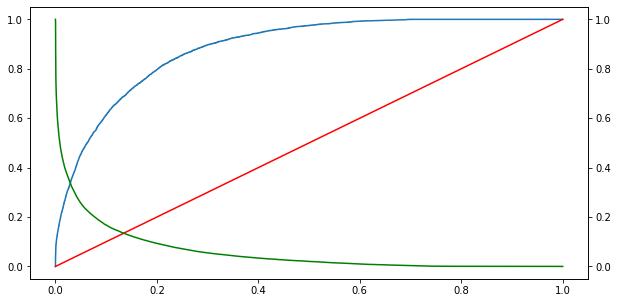

In [19]:
####### AUC-ROC-Curve:


fpr, tpr, thresh = roc_curve(y_test_dummy, y_prob)
thresh[thresh>1] = 1

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr)
ax.plot(fpr,fpr,'r')
ax1 = ax.twinx()
ax1.plot(fpr,thresh,'g')
plt.show()

In [20]:
print(logreg_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     93576
           1       0.58      0.19      0.28      6186

    accuracy                           0.94     99762
   macro avg       0.77      0.59      0.63     99762
weighted avg       0.93      0.94      0.93     99762



### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_dummy,y_train_dummy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred = rf.predict(X_test_dummy)
y_pred = rf.predict(X_test_dummy)
y_prob = rf.predict_proba(X_test_dummy)[:,1] 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

score = accuracy_score(y_test_dummy,y_pred )
cm = confusion_matrix(y_test_dummy,y_pred)
roc_score = roc_auc_score(y_test_dummy,y_prob)
rf_report=classification_report(y_test_dummy,y_pred)

In [23]:
score

0.9503618612297268

In [24]:
cm

array([[92211,  1365],
       [ 3587,  2599]], dtype=int64)

In [25]:
roc_score

0.9192086968851197

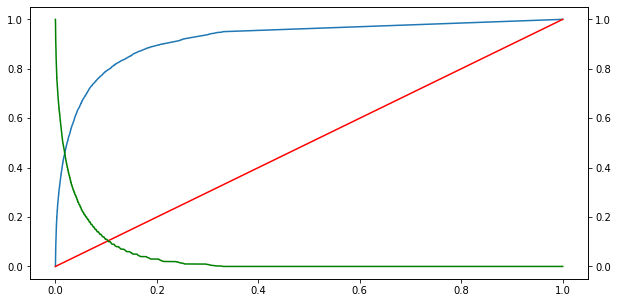

In [26]:
####### AUC-ROC-Curve:


fpr, tpr, thresh = roc_curve(y_test_dummy, y_prob)
thresh[thresh>1] = 1

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr)
ax.plot(fpr,fpr,'r')
ax1 = ax.twinx()
ax1.plot(fpr,thresh,'g')
plt.show()

In [27]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     93576
           1       0.66      0.42      0.51      6186

    accuracy                           0.95     99762
   macro avg       0.81      0.70      0.74     99762
weighted avg       0.94      0.95      0.95     99762



#### Features selected from Feature Importance

industry code_Agriculture, Forestry and Fisheries    0.002375
industry code_Armed Forces                           0.000131
industry code_Children                               0.000247
industry code_Construction                           0.005267
industry code_Finance, insurance and real estate     0.008497
                                                       ...   
weeks worked in year                                 0.028987
education                                            0.098225
own business or self employed                        0.020518
veterans benefits                                    0.004915
num persons worked for employer                      0.085012
Length: 71, dtype: float64


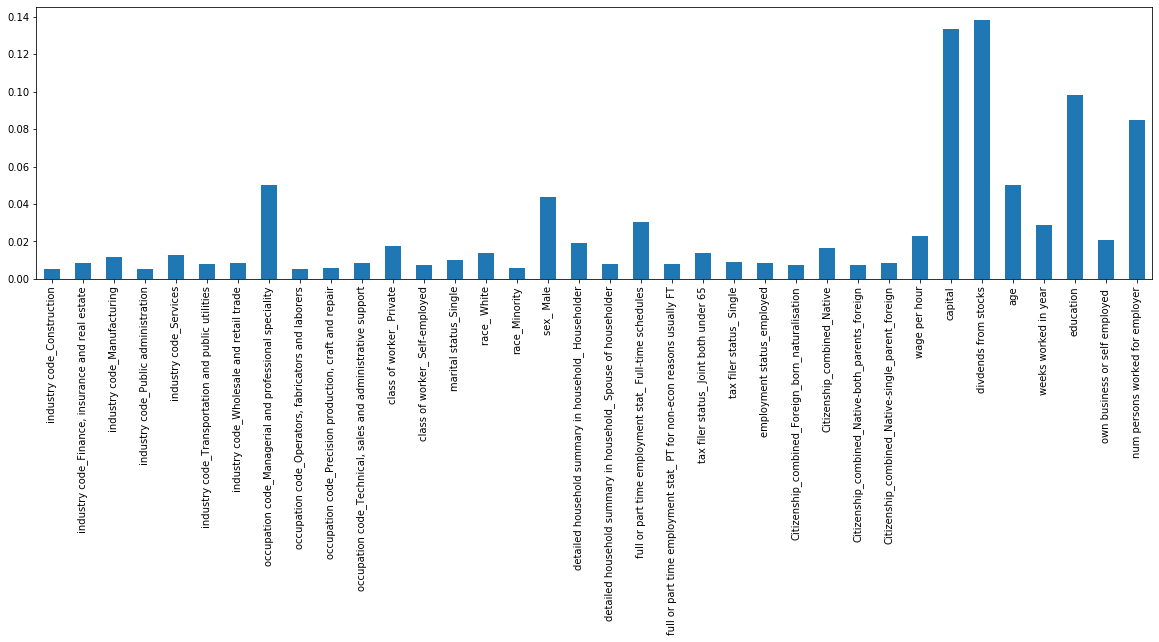

In [28]:
imp_features = pd.Series(rf.feature_importances_,index=X_train_dummy.columns)
print(imp_features)

imp_features[imp_features > 0.005].plot(kind='bar',rot=90,figsize=(20,5))

In [29]:
imp_features[imp_features > 0.01].count()

19

In [30]:
for i in X_train_dummy.columns:
    if i not in imp_features[imp_features >= 0.01].index:
        X_train_dummy.drop(i,axis=1,inplace=True)
        X_test_dummy.drop(i,axis=1,inplace=True)

In [31]:
X_train_dummy.head()

,industry code_Manufacturing,industry code_Services,occupation code_Managerial and professional speciality,class of worker_ Private,marital status_Single,race_ White,sex_ Male,detailed household summary in household_ Householder,full or part time employment stat_ Full-time schedules,tax filer status_ Joint both under 65,Citizenship_combined_Native,wage per hour,capital,divdends from stocks,age,weeks worked in year,education,own business or self employed,num persons worked for employer
0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,6,0,2,0,0
1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,5,2,2,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,2,0,0
3,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_dummy,y_train_dummy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_pred = rf.predict(X_test_dummy)
y_pred = rf.predict(X_test_dummy)
y_prob = rf.predict_proba(X_test_dummy)[:,1] 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

score = accuracy_score(y_test_dummy,y_pred )
cm = confusion_matrix(y_test_dummy,y_pred)
roc_score = roc_auc_score(y_test_dummy,y_prob)
rf_report=classification_report(y_test_dummy,y_pred)

In [34]:
score

0.9505723622220885

In [35]:
cm

array([[92131,  1445],
       [ 3486,  2700]], dtype=int64)

In [36]:
roc_score

0.911307846032351

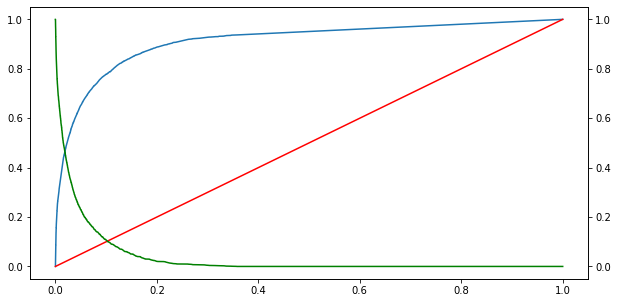

In [37]:
####### AUC-ROC-Curve:


fpr, tpr, thresh = roc_curve(y_test_dummy, y_prob)
thresh[thresh>1] = 1

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr)
ax.plot(fpr,fpr,'r')
ax1 = ax.twinx()
ax1.plot(fpr,thresh,'g')
plt.show()

In [38]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     93576
           1       0.65      0.44      0.52      6186

    accuracy                           0.95     99762
   macro avg       0.81      0.71      0.75     99762
weighted avg       0.94      0.95      0.95     99762



#### Sampling the data:

In [97]:
X_train_dummy = train_dummy.drop('total person income',axis=1)
y_train_dummy = train_dummy['total person income']

X_test_dummy = test_dummy.drop('total person income',axis=1)
y_test_dummy = test_dummy['total person income']
test_final_dummy = pd.concat([X_test_dummy,y_test_dummy],axis=1)

In [98]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler      #under sampling
nm = NearMiss()
ru = RandomUnderSampler()
from imblearn.over_sampling import SMOTE
sm =SMOTE()

X_train_sm, y_train_sm = sm.fit_resample(X_train_dummy,y_train_dummy)

In [99]:
X_train_col = X_train.columns
y_train_col = ['total person income']

y_train_sm = pd.DataFrame(y_train_sm, columns=y_train_col)
 
train_sm = pd.concat([X_train_sm,y_train_sm],axis=1)

In [102]:
train_sm

,"industry code_Agriculture, Forestry and Fisheries",industry code_Armed Forces,industry code_Children,industry code_Construction,"industry code_Finance, insurance and real estate",industry code_Manufacturing,industry code_Mining,industry code_Public administration,industry code_Services,industry code_Transportation and public utilities,...,wage per hour,capital,divdends from stocks,age,weeks worked in year,education,own business or self employed,veterans benefits,num persons worked for employer,total person income
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,2,0,2,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,5,2,2,0,2,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,2,0,2,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367819,0,0,0,0,1,0,0,0,0,0,...,0,0,0,4,1,3,0,2,6,1
367820,0,0,0,0,0,1,0,0,0,0,...,0,-1902,0,3,2,3,0,2,6,1
367821,0,0,0,0,1,0,0,0,0,0,...,0,15024,2500,4,2,3,0,2,5,1
367822,0,0,0,0,0,0,0,0,0,0,...,807,25124,4372,5,1,2,0,2,3,1


In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
y_pred = rf.predict(X_test_dummy)
y_pred = rf.predict(X_test_dummy)
y_prob = rf.predict_proba(X_test_dummy)[:,1] 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

score = accuracy_score(y_test_dummy,y_pred)
cm = confusion_matrix(y_test_dummy,y_pred)
roc_score = roc_auc_score(y_test_dummy,y_prob)
rf_report=classification_report(y_test_dummy,y_pred)

In [106]:
score

0.9259938653996511

In [107]:
cm

array([[88925,  4651],
       [ 2732,  3454]], dtype=int64)

In [108]:
roc_score

0.9066709342877702

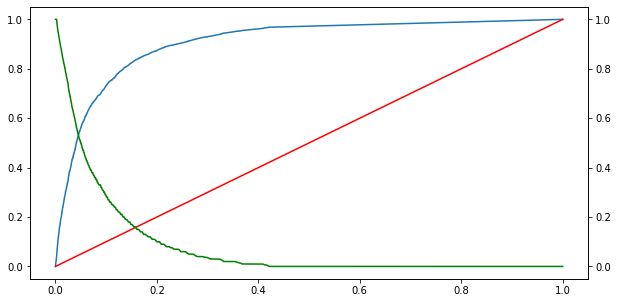

In [109]:
####### AUC-ROC-Curve:

fpr, tpr, thresh = roc_curve(y_test_dummy, y_prob )

thresh[thresh>1] = 1

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr)
ax.plot(fpr,fpr,'r')
ax1 = ax.twinx()
ax1.plot(fpr,thresh,'g')
plt.show()

In [110]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     93576
           1       0.43      0.56      0.48      6186

    accuracy                           0.93     99762
   macro avg       0.70      0.75      0.72     99762
weighted avg       0.94      0.93      0.93     99762



In [111]:
imp_features = pd.Series(rf.feature_importances_,index=X_train_sm.columns)

In [112]:
for i in X_train_dummy.columns:
    if i not in imp_features[imp_features >= 0.005].index:
        X_train_sm.drop(i,axis=1,inplace=True)
        X_test_dummy.drop(i,axis=1,inplace=True)

In [115]:
X_test_dummy

,industry code_Construction,"industry code_Finance, insurance and real estate",industry code_Manufacturing,industry code_Services,industry code_Transportation and public utilities,industry code_Wholesale and retail trade,occupation code_Managerial and professional speciality,"occupation code_Operators, fabricators and laborers","occupation code_Precision production, craft and repair",occupation code_Service Occupations,...,Citizenship_combined_Native-single_parent_foreign,wage per hour,capital,divdends from stocks,age,weeks worked in year,education,own business or self employed,veterans benefits,num persons worked for employer
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,4,1,1,0,2,4
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,2500,4,1,5,0,2,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,3,2,2,2,2,5
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,4,2,2,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99758,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,5,2,2,0,2,4
99759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,2,1,0,2,2
99760,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,3,2,3,0,2,5


In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
y_pred = rf.predict(X_test_dummy)
y_prob = rf.predict_proba(X_test_dummy)[:,1] 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

score = accuracy_score(y_test_dummy,y_pred)
cm = confusion_matrix(y_test_dummy,y_pred)
roc_score = roc_auc_score(y_test_dummy,y_prob)
rf_report=classification_report(y_test_dummy,y_pred)

In [118]:
score

0.9197289549126922

In [119]:
cm

array([[88130,  5446],
       [ 2562,  3624]], dtype=int64)

In [120]:
roc_score

0.9035589089884937

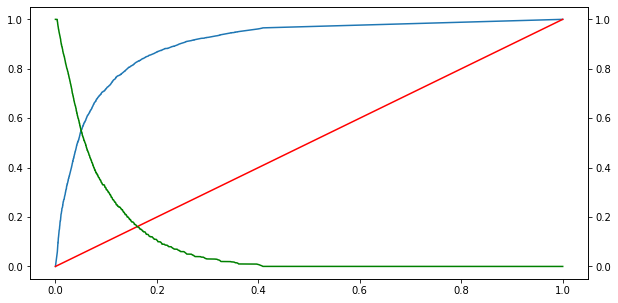

In [121]:
####### AUC-ROC-Curve:

fpr, tpr, thresh = roc_curve(y_test_dummy, y_prob )

thresh[thresh>1] = 1

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr)
ax.plot(fpr,fpr,'r')
ax1 = ax.twinx()
ax1.plot(fpr,thresh,'g')
plt.show()

In [122]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     93576
           1       0.40      0.59      0.48      6186

    accuracy                           0.92     99762
   macro avg       0.69      0.76      0.72     99762
weighted avg       0.94      0.92      0.93     99762



### Gradient Boosting Classifier

In [132]:
X_train_dummy = train_dummy.drop('total person income',axis=1)
y_train_dummy = train_dummy['total person income']

X_test_dummy = test_dummy.drop('total person income',axis=1)
y_test_dummy = test_dummy[['total person income']]
test_final_dummy = pd.concat([X_test_dummy,y_test_dummy],axis=1)

In [133]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler      #under sampling
nm = NearMiss()
ru = RandomUnderSampler()
from imblearn.over_sampling import SMOTE
sm =SMOTE()

X_train_sm, y_train_sm = sm.fit_resample(X_train_dummy,y_train_dummy)

In [134]:
X_train_col = X_train.columns
y_train_col = ['total person income']

y_train_sm = pd.DataFrame(y_train_sm, columns=y_train_col)
 
train_sm = pd.concat([X_train_sm,y_train_sm],axis=1)

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [136]:
y_pred = gbc.predict(X_test_dummy)

y_prob = gbc.predict_proba(X_test_dummy)[:,1] 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

score = accuracy_score(y_test_dummy,y_pred)
cm = confusion_matrix(y_test_dummy,y_pred)
roc_score = roc_auc_score(y_test_dummy,y_prob)
gbc_report=classification_report(y_test_dummy,y_pred)

In [137]:
score

0.8652793648884345

In [138]:
cm

array([[81145, 12431],
       [ 1009,  5177]], dtype=int64)

In [139]:
roc_score

0.932411748575223

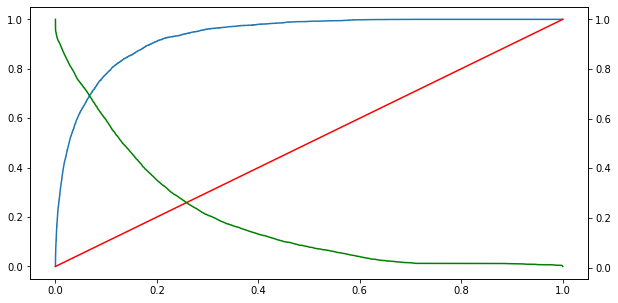

In [140]:
####### AUC-ROC-Curve:

fpr, tpr, thresh = roc_curve(y_test_dummy, y_prob )

thresh[thresh>1] = 1

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr)
ax.plot(fpr,fpr,'r')
ax1 = ax.twinx()
ax1.plot(fpr,thresh,'g')
plt.show()

In [141]:
print(gbc_report)

              precision    recall  f1-score   support

           0       0.99      0.87      0.92     93576
           1       0.29      0.84      0.44      6186

    accuracy                           0.87     99762
   macro avg       0.64      0.85      0.68     99762
weighted avg       0.94      0.87      0.89     99762



In [142]:
imp_features = pd.Series(gbc.feature_importances_,index=X_train_sm.columns)

In [143]:
for i in X_train_dummy.columns:
    if i not in imp_features[imp_features >= 0.005].index:
        X_train_sm.drop(i,axis=1,inplace=True)
        X_test_dummy.drop(i,axis=1,inplace=True)

In [155]:
X_train_sm

,industry code_Services,industry code_Wholesale and retail trade,occupation code_Managerial and professional speciality,"occupation code_Operators, fabricators and laborers","occupation code_Precision production, craft and repair",occupation code_Service Occupations,"occupation code_Technical, sales and administrative support",class of worker_beneficiary or investor,marital status_Single,sex_ Male,detailed household summary in household_ Householder,detailed household summary in household_ Spouse of householder,tax filer status_ Nonfiler,capital,divdends from stocks,age,weeks worked in year,education,num persons worked for employer
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,6,0,2,0
1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,5,2,2,1
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,2,0
3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367819,0,0,0,0,0,0,0,0,1,1,0,0,0,-2258,0,3,1,2,1
367820,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,3,2,2,6
367821,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1100,3,2,3,4
367822,0,0,1,0,0,0,0,0,1,0,0,0,0,-2258,2000,3,2,2,3


In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [146]:
y_pred = gbc.predict(X_test_dummy)

y_prob = gbc.predict_proba(X_test_dummy)[:,1] 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

score = accuracy_score(y_test_dummy,y_pred)
cm = confusion_matrix(y_test_dummy,y_pred)
roc_score = roc_auc_score(y_test_dummy,y_prob)
gbc_report=classification_report(y_test_dummy,y_pred)

In [147]:
score

0.8598965537980393

In [148]:
cm

array([[80562, 13014],
       [  963,  5223]], dtype=int64)

In [149]:
roc_score

0.9330264728637785

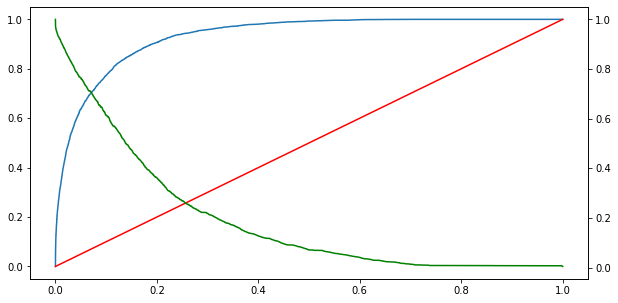

In [150]:
####### AUC-ROC-Curve:

fpr, tpr, thresh = roc_curve(y_test_dummy, y_prob )

thresh[thresh>1] = 1

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr)
ax.plot(fpr,fpr,'r')
ax1 = ax.twinx()
ax1.plot(fpr,thresh,'g')
plt.show()

In [151]:
print(gbc_report)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     93576
           1       0.29      0.84      0.43      6186

    accuracy                           0.86     99762
   macro avg       0.64      0.85      0.67     99762
weighted avg       0.94      0.86      0.89     99762

